# Modern Ecommerce Stock/Portfolio Analysis

***

## Part 1 - Intial Libraries and Data

### 1.1 - Import Libraries

In [43]:
# Importing Libraries
import os
import requests
import yfinance as yf # Used to grab the stock prices with yahoo
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns # Used for Heatmap Visualization
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi # Used with the Monte Carlo simulation library
from utils.MCForecastTools import MCSimulation
import hvplot.pandas # Used for visualization
from bokeh.models.formatters import NumeralTickFormatter # Used for yformatter in plot

### 1.2 - Initial Data

In [47]:
# List of Stocks Tickers
amazon = yf.Ticker("AMZN")
walmart = yf.Ticker("WMT")
ebay = yf.Ticker("EBAY")
target = yf.Ticker("TGT")
overstock = yf.Ticker("OSTK")

In [49]:
total_investment = 500000

#Amazon Data
initial_amazon_price = 1627.80
initial_amazon_investment = 100000
amount_of_amazon_stock = initial_amazon_investment/initial_amazon_price
current_amazon_price = amazon.info['open']
current_amazon_investment_value = current_amazon_price * amount_of_amazon_stock

#Walmart Data
initial_walmart_price = 97.52
initial_walmart_investment = 100000
amount_of_walmart_stock = initial_walmart_investment/initial_walmart_price
current_walmart_price = walmart.info['open']
current_walmart_investment_value = current_walmart_price * amount_of_walmart_stock

#Ebay Data
initial_ebay_price = 28.54
initial_ebay_investment = 100000
amount_of_ebay_stock = initial_ebay_investment/initial_ebay_price
current_ebay_price = ebay.info['open']
current_ebay_investment_value = current_ebay_price * amount_of_ebay_stock

#Target Data
initial_target_price = 79.59
initial_target_investment = 100000
amount_of_target_stock = initial_target_investment/initial_target_price
current_target_price = target.info['open']
current_target_investment_value = current_target_price * amount_of_target_stock

#Overstock Data
initial_overstock_price = 19.80
initial_overstock_investment = 100000
amount_of_overstock_stock = initial_overstock_investment/initial_overstock_price
current_overstock_price = overstock.info['open']
current_overstock_investment_value = current_overstock_price * amount_of_overstock_stock


print("Current Amazon Price:",current_amazon_price)
print("Current Amazon Investment Value:",current_amazon_investment_value)
print("Current Walmart Price:",current_walmart_price)
print("Current Walmart Investment Value:",current_walmart_investment_value)
print("Current Ebay Price:",current_ebay_price)
print("Current Ebay Investment Value:",current_ebay_investment_value)
print("Current Target Price:",current_target_price)
print("Current Target Investment Value:",current_target_investment_value)
print("Current Overstock Price:",current_overstock_price)
print("Current Overstock Investment Value:",current_overstock_investment_value)

Current Amazon Price: 3513
Current Amazon Investment Value: 215812.75340950978
Current Walmart Price: 148.77
Current Walmart Investment Value: 152553.32239540608
Current Ebay Price: 74.03
Current Ebay Investment Value: 259390.32936229857
Current Target Price: 254.27
Current Target Investment Value: 319474.80839301425
Current Overstock Price: 97.66
Current Overstock Investment Value: 493232.3232323232


***

## Part 2 - Rate of Return Calculations

### 2.1 - Amazon Expected Rate of Return Calculations

#### Year 1

In [50]:
# Amazon Return calculations
amazon_historical_year1_begin = amazon.history(start="2018-11-05", end="2018-11-06")
amazon_historical_year1_end = amazon.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_amazon = amazon_historical_year1_begin['Close']['2018-11-05']
current_value_year1_amazon= amazon_historical_year1_end['Close']['2019-11-05']

year1_ror_amazon = ((current_value_year1_amazon - initial_value_year1_amazon)/initial_value_year1_amazon)*100
year1_ror_amazon

10.683739211985838

#### Year 2

In [51]:
amazon_historical_year2_begin = amazon.history(start="2019-11-05", end="2019-11-06")
amazon_historical_year2_end = amazon.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_amazon = amazon_historical_year2_begin['Close']['2019-11-05']
current_value_year2_amazon= amazon_historical_year2_end['Close']['2020-11-05']

year2_ror_amazon = ((current_value_year2_amazon - initial_value_year2_amazon)/initial_value_year2_amazon)*100
year2_ror_amazon

84.38039817859662

#### Year 3

In [52]:
amazon_historical_year3_begin = amazon.history(start="2020-11-05", end="2020-11-06")
amazon_historical_year3_end = amazon.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_amazon = amazon_historical_year3_begin['Close']['2020-11-05']
current_value_year3_amazon= amazon_historical_year3_end['Close']['2021-11-05']

year3_ror_amazon = ((current_value_year3_amazon - initial_value_year3_amazon)/initial_value_year3_amazon)*100
year3_ror_amazon


5.929861235231035

#### Expected Rate of Return based on 3 year period

In [53]:
# Expected rate of return
expected_ror_amazon = (year1_ror_amazon + year2_ror_amazon + year3_ror_amazon)/3
expected_ror_amazon

33.664666208604494

### 2.2 - Walmart Expected Rate of Return Calculations

#### Year 1

In [54]:
# Walmart Return calculations
walmart_historical_year1_begin = walmart.history(start="2018-11-05", end="2018-11-06")
walmart_historical_year1_end = walmart.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_wmt = walmart_historical_year1_begin['Close']['2018-11-05']
current_value_year1_wmt= walmart_historical_year1_end['Close']['2019-11-05']

year1_ror_wmt = ((current_value_year1_wmt - initial_value_year1_wmt)/initial_value_year1_wmt)*100
year1_ror_wmt

17.95212257222355

#### Year 2

In [55]:
walmart_historical_year2_begin = walmart.history(start="2019-11-05", end="2019-11-06")
walmart_historical_year2_end = walmart.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_wmt = walmart_historical_year2_begin['Close']['2019-11-05']
current_value_year2_wmt= walmart_historical_year2_end['Close']['2020-11-05']

year2_ror_wmt = ((current_value_year2_wmt - initial_value_year2_wmt)/initial_value_year2_wmt)*100
year2_ror_wmt

22.82151654564294

#### Year 3

In [56]:
walmart_historical_year3_begin = walmart.history(start="2020-11-05", end="2020-11-06")
walmart_historical_year3_end = walmart.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_wmt = walmart_historical_year3_begin['Close']['2020-11-05']
current_value_year3_wmt= walmart_historical_year3_end['Close']['2021-11-05']

year3_ror_wmt = ((current_value_year3_wmt - initial_value_year3_wmt)/initial_value_year3_wmt)*100
year3_ror_wmt

6.3376575236515675

#### Expected Rate of Return based on 3 year period

In [57]:
# Expected rate of return 
expected_ror_wmt = (year1_ror_wmt + year2_ror_wmt + year3_ror_wmt)/3
expected_ror_wmt

15.703765547172686

### 2.3 - Ebay Expected Rate of Return Calculations

#### Year 1

In [58]:
# Ebay Return calculations
ebay_historical_year1_begin = ebay.history(start="2018-11-05", end="2018-11-06")
ebay_historical_year1_end = ebay.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_ebay = ebay_historical_year1_begin['Close']['2018-11-05']
current_value_year1_ebay= ebay_historical_year1_end['Close']['2019-11-05']

year1_ror_ebay = ((current_value_year1_ebay - initial_value_year1_ebay)/initial_value_year1_ebay)*100
year1_ror_ebay

21.036574485872823

#### Year 2

In [59]:
ebay_historical_year2_begin = ebay.history(start="2019-11-05", end="2019-11-06")
ebay_historical_year2_end = ebay.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_ebay = ebay_historical_year2_begin['Close']['2019-11-05']
current_value_year2_ebay= ebay_historical_year2_end['Close']['2020-11-05']

year2_ror_ebay = ((current_value_year2_ebay - initial_value_year2_ebay)/initial_value_year2_ebay)*100
year2_ror_ebay

41.37556535702825

#### Year 3

In [60]:
ebay_historical_year3_begin = ebay.history(start="2020-11-05", end="2020-11-06")
ebay_historical_year3_end = ebay.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_ebay = ebay_historical_year3_begin['Close']['2020-11-05']
current_value_year3_ebay= ebay_historical_year3_end['Close']['2021-11-05']

year3_ror_ebay = ((current_value_year3_ebay - initial_value_year3_ebay)/initial_value_year3_ebay)*100
year3_ror_ebay

54.73517929318137

#### Expected Rate of Return based on 3 year period

In [61]:
# Expected rate of return
expected_ror_ebay = (year1_ror_ebay + year2_ror_ebay + year3_ror_ebay)/3
expected_ror_ebay

39.04910637869415

### 2.4 - Target Expected Rate of Return Calculations

#### Year 1

In [62]:
target_historical_year2_begin = target.history(start="2019-11-05", end="2019-11-06")
target_historical_year2_end = target.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_target = target_historical_year2_begin['Close']['2019-11-05']
current_value_year2_target= target_historical_year2_end['Close']['2020-11-05']

year2_ror_target = ((current_value_year2_target - initial_value_year2_target)/initial_value_year2_target)*100
year2_ror_target

47.307620628610564

#### Year 2

In [63]:
# Target Return calculations
target_historical_year1_begin = target.history(start="2018-11-05", end="2018-11-06")
target_historical_year1_end = target.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_target = target_historical_year1_begin['Close']['2018-11-05']
current_value_year1_target= target_historical_year1_end['Close']['2019-11-05']

year1_ror_target = ((current_value_year1_target - initial_value_year1_target)/initial_value_year1_target)*100
year1_ror_target

33.372053554302525

#### Year 3

In [64]:
target_historical_year3_begin = target.history(start="2020-11-05", end="2020-11-06")
target_historical_year3_end = target.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_target = target_historical_year3_begin['Close']['2020-11-05']
current_value_year3_target= target_historical_year3_end['Close']['2021-11-05']

year3_ror_target = ((current_value_year3_target - initial_value_year3_target)/initial_value_year3_target)*100
year3_ror_target

62.60844855852912

#### Expected Rate of Return based on 3 year period

In [65]:
# Expected rate of return
expected_ror_target = (year1_ror_target + year2_ror_target + year3_ror_target)/3
expected_ror_target

47.762707580480736

### 2.5 - Overstock Expected Rate of Return Calculations

#### Year 1

In [66]:
# Overstock Return calculations
overstock_historical_year1_begin = overstock.history(start="2018-11-05", end="2018-11-06")
overstock_historical_year1_end = overstock.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_overstock = overstock_historical_year1_begin['Close']['2018-11-05']
current_value_year1_overstock= overstock_historical_year1_end['Close']['2019-11-05']

year1_ror_overstock = ((current_value_year1_overstock - initial_value_year1_overstock)/initial_value_year1_overstock)*100
year1_ror_overstock

-49.34343374015091

#### Year 2

In [67]:
overstock_historical_year2_begin = overstock.history(start="2019-11-05", end="2019-11-06")
overstock_historical_year2_end = overstock.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_overstock = overstock_historical_year2_begin['Close']['2019-11-05']
current_value_year2_overstock= overstock_historical_year2_end['Close']['2020-11-05']

year2_ror_overstock = ((current_value_year2_overstock - initial_value_year2_overstock)/initial_value_year2_overstock)*100
year2_ror_overstock


583.3499774702757

#### Year 3

In [68]:
overstock_historical_year3_begin = overstock.history(start="2020-11-05", end="2020-11-06")
overstock_historical_year3_end = overstock.history(start="2021-11-05", end="2021-11-06")
initial_value_year3_overstock = overstock_historical_year3_begin['Close']['2020-11-05']
current_value_year3_overstock= overstock_historical_year3_end['Close']['2021-11-05']

year3_ror_overstock = ((current_value_year3_overstock - initial_value_year3_overstock)/initial_value_year3_overstock)*100
year3_ror_overstock

52.40734999874773

#### Expected Rate of Return based on 3 year period

In [69]:
# Expected rate of return
expected_ror_overstock = (year1_ror_overstock + year2_ror_overstock + year3_ror_overstock)/3
expected_ror_overstock

195.47129790962416

***

## Part 3 - Investment Values, Expected Rate of Return and Correlation Visualizatiions

### 3.1 - Investment Value Visualization

In [70]:
# Investment stocks series and creating data frame
investment_list = pd.Series(
    {
        "Current Amazon Investment Value": current_amazon_investment_value,
        "Current Walmart Investment Value": current_walmart_investment_value,
        "Current Ebay Investment Value": current_ebay_investment_value,
        "Current Target Investment Value": current_target_investment_value,
        "Current Overstock Investment Value": current_overstock_investment_value
    }
)

investment_values_df = pd.DataFrame(data=investment_list)
investment_values_df.T

,Current Amazon Investment Value,Current Walmart Investment Value,Current Ebay Investment Value,Current Target Investment Value,Current Overstock Investment Value
0,215812.75341,152553.322395,259390.329362,319474.808393,493232.323232


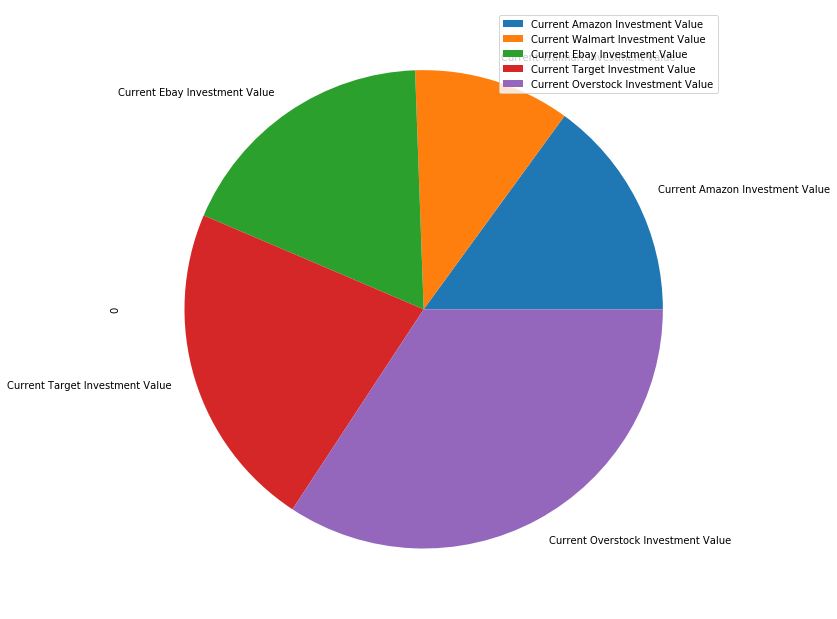

In [71]:
# Investment values Pie Chart
plot = investment_values_df.plot.pie(subplots=True, figsize=(15, 11))

### 3.2 - Closing Prices Visualization

In [72]:
# Stocks 3Y History Data
amazon_history = amazon.history(period = "3y")
walmart_history = walmart.history(period = "3y")
ebay_history = ebay.history(period = "3y")
target_history = target.history(period = "3y")
overstock_history = overstock.history(period = "3y")

In [73]:
# Start time and sotcks list
start = datetime(2018, 11, 5)
symbols_list = ['AMZN', 'WMT', 'EBAY', 'TGT', 'OSTK']

,Overstock,Target,Ebay,Walmart,Amazon
Date,,,,,
2018-11-12,17.760000,79.702507,27.886227,98.428764,1636.849976
2018-11-13,17.790001,78.630127,27.058117,97.547485,1631.170044
2018-11-14,16.950001,77.520424,26.855902,96.211349,1599.010010
2018-11-15,17.530001,75.310341,27.125517,94.325600,1619.439941
2018-11-16,17.190001,74.303230,27.077370,92.572510,1593.410034
...,...,...,...,...,...
2021-11-05,104.459999,254.270004,75.570000,150.229996,3518.989990
2021-11-08,105.360001,253.330002,73.760002,149.270004,3488.979980
2021-11-09,101.980003,255.160004,73.959999,149.789993,3576.229980


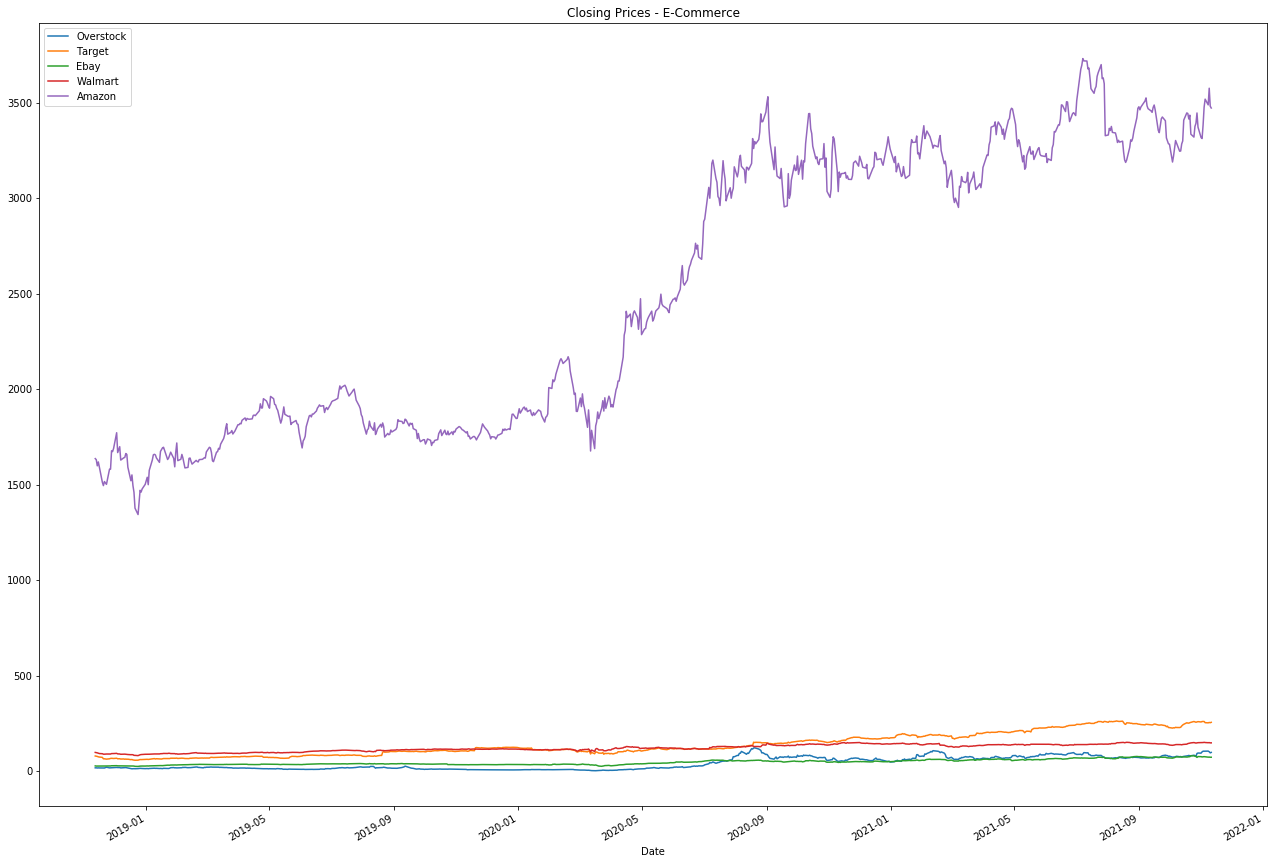

In [74]:
# Data frames and Plot
overstock_df = pd.DataFrame(data = overstock_history['Close'])
target_df = pd.DataFrame(data = target_history['Close'])
ebay_df = pd.DataFrame(data = ebay_history['Close'])
walmart_df = pd.DataFrame(data = walmart_history['Close'])
amazon_df = pd.DataFrame(data = amazon_history['Close'])

dataframe = pd.concat([overstock_df, target_df, ebay_df, walmart_df, amazon_df], axis = 1)

dataframe.columns = [ "Overstock", "Target", "Ebay", "Walmart", "Amazon"]
display(dataframe)
dataframe.plot(figsize=(22,16), title=("Closing Prices - E-Commerce"))

### 3.3 - Correlation Calulations and Visualization

In [75]:
# Correlation of all stocks
corr_df = dataframe.corr(method='pearson') 

# Reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head()

,Overstock,Target,Ebay,Walmart,Amazon
Overstock,1.000000,0.828630,0.883554,0.806494,0.921312
Target,0.828630,1.000000,0.936556,0.896709,0.887731
Ebay,0.883554,0.936556,1.000000,0.852328,0.922393
Walmart,0.806494,0.896709,0.852328,1.000000,0.921519
Amazon,0.921312,0.887731,0.922393,0.921519,1.000000


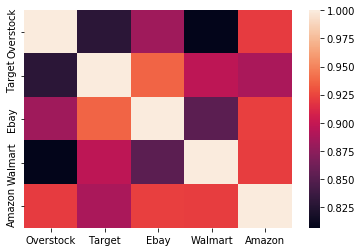

In [76]:
# Heatmap from the correlation values
sns.heatmap(corr_df)

***

## Part 4 - Portfolio Mean-Variance Calulations and Graph comparisons

### 4.1 - Mean-Variance Caluculations

#### Standard Deviation Calculation

In [77]:
# Variance calculations
overstock_std = float(overstock_df['Close'].std())/100
target_std = float(target_df['Close'].std())/100
ebay_std = float(ebay_df['Close'].std())/100
walmart_std = float(walmart_df['Close'].std())/100
amazon_std = float(amazon_df['Close'].std())/100

display(overstock_std)
display(target_std)
display(ebay_std)
display(walmart_std)
display(amazon_std)

0.32564771273515963

0.607297408770924

0.14089210297664137

0.18699765223656864

7.233631883711597

#### Variance Function

In [78]:
# Variance function
def variance(weight1, std_1, weight2, std_2, corr_ratio):
    variance = (((weight1 ** 2) * (std_1 ** 2)) + ((weight2 ** 2) * (std_2 ** 2)) + ((weight1 ** 2) * (std_1 ** 2) * (weight2 ** 2) * (std_2 ** 2) * (corr_ratio * std_1 * std_2)))
    return variance

#### Overstock VS.

In [79]:
# 

ostk_to_target_variance = variance(.50,overstock_std,.50,target_std,0.825182)
ostk_to_ebay_variance = variance(.50,overstock_std,.50,ebay_std,0.880374)
ostk_to_walmart_variance = variance(.50,overstock_std,.50,walmart_std,0.803650)
ostk_to_amazon_variance = variance(.50,overstock_std,.50,amazon_std,0.825182)

ostk_to_target_percentage = "{:.2%}".format(ostk_to_target_variance)
ostk_to_ebay_percentage = "{:.2%}".format(ostk_to_ebay_variance)
ostk_to_walmart_percentage = "{:.2%}".format(ostk_to_walmart_variance)
ostk_to_amazon_percentage = "{:.2%}".format(ostk_to_amazon_variance)

#### Target VS.

In [80]:
#

tgt_to_ebay_variance = variance(.50,target_std,.50,ebay_std,0.935200)
tgt_to_walmart_variance = variance(.50,target_std,.50,walmart_std,0.895973)
tgt_to_amazon_variance = variance(.50,target_std,.50,amazon_std,0.887384)

tgt_to_ebay_percentage = "{:.2%}".format(tgt_to_ebay_variance)
tgt_to_walmart_percentage = "{:.2%}".format(tgt_to_walmart_variance)
tgt_to_amazon_percentage = "{:.2%}".format(tgt_to_amazon_variance)

#### Ebay VS.

In [81]:
#

ebay_to_walmart_variance = variance(.50,ebay_std,.50,walmart_std,0.851683)
ebay_to_amazon_variance = variance(.50,ebay_std,.50,amazon_std,0.922619)

ebay_to_walmart_percentage = "{:.2%}".format(ebay_to_walmart_variance)
ebay_to_amazon_percentage = "{:.2%}".format(ebay_to_amazon_variance)


#### Walmart VS.

In [82]:
#

walmart_to_amazon_variance = variance(.50,walmart_std,.50,amazon_std,0.921194)

walmart_to_amazon_percentage = "{:.2%}".format(walmart_to_amazon_variance)

### 4.2 - Graph Comparisons

#### Dataframe Creation

In [83]:
#

overstock_vs = [ostk_to_target_variance, ostk_to_ebay_variance, ostk_to_walmart_variance]
ebay_vs = [tgt_to_ebay_variance, ostk_to_ebay_variance, ebay_to_walmart_variance]
target_vs = [tgt_to_ebay_variance, tgt_to_walmart_variance,  ostk_to_target_variance]
walmart_vs =[ostk_to_walmart_variance, ebay_to_walmart_variance, tgt_to_walmart_variance]
amazon_vs = [ostk_to_amazon_variance, ebay_to_amazon_variance,tgt_to_amazon_variance, walmart_to_amazon_variance]

overstock_vs_dataframe = pd.DataFrame(overstock_vs)
ebay_vs_dataframe = pd.DataFrame(ebay_vs)
target_vs_dataframe = pd.DataFrame(target_vs)
walmart_vs_dataframe = pd.DataFrame(walmart_vs)
amazon_vs_dataframe = pd.DataFrame(amazon_vs)

overstock_vs_dataframe = overstock_vs_dataframe.set_axis(['Target', 'Ebay', 'Walmart',], axis='index')
ebay_vs_dataframe = ebay_vs_dataframe.set_axis(['Target', 'Overstock', 'Walmart',], axis='index')
target_vs_dataframe = target_vs_dataframe.set_axis(['Ebay', 'Walmart', 'Overstock'], axis='index')
walmart_vs_dataframe = walmart_vs_dataframe.set_axis(['Overstock', 'Ebay', 'Target',], axis='index')
amazon_vs_dataframe = amazon_vs_dataframe.set_axis(['Overstock', 'Ebay', 'Target','Walmart'], axis='index')

#### Plot Creation

In [84]:
#

overstock_vs_plot = overstock_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Overstock Vs.",
    color = "#C9412E",
    yformatter = "%.3f"
)

ebay_vs_plot = ebay_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Ebay Vs.",
    color = "#DED02C",
    yformatter = "%.3f"
)

target_vs_plot = target_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Target Vs.",
    color = "#3CCF3E",
    yformatter = "%.3f"
)

walmart_vs_plot = walmart_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Walmart Vs.",
    color = "#1961E6",
    yformatter = "%.3f"
)

amazon_vs_plot = amazon_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Amazon Vs.",
    color = "#923DD5",
    yformatter = "%.3f"
)

#### Display Graphs

In [85]:
overstock_vs_plot + ebay_vs_plot + target_vs_plot + walmart_vs_plot 

:Layout
   .Bars.Overstock_Vs_full_stop :Bars   [index]   (0)
   .Bars.Ebay_Vs_full_stop      :Bars   [index]   (0)
   .Bars.Target_Vs_full_stop    :Bars   [index]   (0)
   .Bars.Walmart_Vs_full_stop   :Bars   [index]   (0)

In [86]:
amazon_vs_plot

:Bars   [index]   (0)

***

## Part 5 - Monte Carlo Simulation of the Portfolio

### 5.1 - Alpaca Data Collection

In [41]:
# Load the environment variables from the .env file

load_dotenv("/Users/johannmaiga/Downloads/MyFiles/FinTech Class/.api_keys")

True

In [42]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [43]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AMZN", "WMT", "EBAY", "TGT", "OSTK"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
start = pd.Timestamp("2018-11-05", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-11-04", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [44]:
# Creating a data frame from the gathered data
ecom_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df


# Display both the first and last five rows of the DataFrame
ecom_stocks.index = ecom_stocks.index.date
ecom_stocks.head()

AMZN                                          EBAY          \
               open       high       low    close   volume   open    high   
2018-11-05  1657.57  1658.0900  1596.360  1627.45  5231856  29.91  30.060   
2018-11-06  1618.35  1665.0000  1614.550  1642.86  4000487  29.59  30.260   
2018-11-07  1673.00  1759.2300  1664.075  1757.36  7606948  30.09  30.180   
2018-11-08  1752.89  1784.0000  1725.110  1754.95  3299391  29.74  29.967   
2018-11-09  1735.12  1743.9207  1701.870  1712.03  2962981  29.62  29.950   

                                     ...    TGT                          \
              low   close    volume  ...   open    high      low  close   
2018-11-05  29.33  29.630   7945882  ...  84.56  85.520  84.1086  85.33   
2018-11-06  29.46  29.950  11913131  ...  85.44  85.670  84.9300  85.56   
2018-11-07  29.59  29.850  17014253  ...  87.51  87.660  85.7600  86.72   
2018-11-08  29.52  29.845   8355718  ...  87.00  87.855  86.7901  87.60   
2018-11-09  29.58  29.630   7301539  ...  87.44  87.930  86.6700  86.96   

                          WMT                                         
               volume    open      high       low   close     volume  
2018-11-05  3065961.0  101.19  103.1692  100.6324  102.89  5272222.0  
2018-11-06  3218972.0  102.54  103.4400  102.0500  103.32  4385000.0  
2018-11-07  6164998.0  103.66  104.4700  103.0500  104.34  5589694.0  
2018-11-08  3516326.0  104.33  105.2600  104.0300  104.89  4099279.0  
2018-11-09  2715011.0  105.00  105.9000  104.8100  105.55  5650275.0  

[5 rows x 25 columns]

### 5.2 - Monte Carlo Simulation Run

In [45]:
# Configuring the MC simulation
one_year_simulation = MCSimulation(
    portfolio_data=ecom_stocks,
    num_simulation=500,
    num_trading_days=252,
)

# Review the simulation input data
one_year_simulation.portfolio_data.dropna()

AMZN                                                      \
               open       high       low    close   volume daily_return   
2018-11-06  1618.35  1665.0000  1614.550  1642.86  4000487     0.009469   
2018-11-07  1673.00  1759.2300  1664.075  1757.36  7606948     0.069696   
2018-11-08  1752.89  1784.0000  1725.110  1754.95  3299391    -0.001371   
2018-11-09  1735.12  1743.9207  1701.870  1712.03  2962981    -0.024457   
2018-11-12  1699.67  1708.5500  1630.010  1636.79  3229882    -0.043948   
...             ...        ...       ...      ...      ...          ...   
2021-10-29  3300.03  3374.8200  3273.320  3372.43  5462617    -0.020923   
2021-11-01  3366.04  3375.8600  3292.020  3317.99  3317329    -0.016143   
2021-11-02  3317.50  3331.1150  3283.550  3313.17  2364950    -0.001453   
2021-11-03  3310.46  3394.9200  3297.520  3384.00  3051730     0.021378   
2021-11-04  3371.29  3498.6250  3365.000  3477.04  5077538     0.027494   

             EBAY                          ...       TGT                     \
             open    high     low   close  ...       low   close     volume   
2018-11-06  29.59  30.260  29.460  29.950  ...   84.9300   85.56  3218972.0   
2018-11-07  30.09  30.180  29.590  29.850  ...   85.7600   86.72  6164998.0   
2018-11-08  29.74  29.967  29.520  29.845  ...   86.7901   87.60  3516326.0   
2018-11-09  29.62  29.950  29.580  29.630  ...   86.6700   86.96  2715011.0   
2018-11-12  29.60  29.700  28.910  28.960  ...   85.2400   85.46  3437712.0   
...           ...     ...     ...     ...  ...       ...     ...        ...   
2021-10-29  72.11  76.980  72.065  76.730  ...  256.5100  259.61  1603229.0   
2021-11-01  76.65  77.610  75.550  76.300  ...  257.4900  257.87  1526936.0   
2021-11-02  76.24  76.380  74.470  74.900  ...  258.5401  260.29  1729084.0   
2021-11-03  74.69  76.130  73.860  75.440  ...  256.7200  260.47  1969187.0   
2021-11-04  75.56  77.000  74.950  76.280  ...  259.4187  260.43  2152794.0   

                            WMT                                        \
           daily_return    open     high       low   close     volume   
2018-11-06     0.002695  102.54  103.440  102.0500  103.32  4385000.0   
2018-11-07     0.013558  103.66  104.470  103.0500  104.34  5589694.0   
2018-11-08     0.010148  104.33  105.260  104.0300  104.89  4099279.0   
2018-11-09    -0.007306  105.00  105.900  104.8100  105.55  5650275.0   
2018-11-12    -0.017249  105.50  106.210  103.6500  103.88  6950839.0   
...                 ...     ...      ...       ...     ...        ...   
2021-10-29     0.005578  147.94  150.099  147.5606  149.42  5577766.0   
2021-11-01    -0.006702  150.05  150.750  149.3500  149.80  3469224.0   
2021-11-02     0.009385  149.96  150.175  149.2800  149.72  3690780.0   
2021-11-03     0.000692  149.60  150.290  149.0300  150.19  3603828.0   
2021-11-04    -0.000154  150.18  151.848  149.8300  151.28  4142644.0   

                         
           daily_return  
2018-11-06     0.004179  
2018-11-07     0.009872  
2018-11-08     0.005271  
2018-11-09     0.006292  
2018-11-12    -0.015822  
...                 ...  
2021-10-29     0.006670  
2021-11-01     0.002543  
2021-11-02    -0.000534  
2021-11-03     0.003139  
2021-11-04     0.007257  

[753 rows x 30 columns]

In [46]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns
one_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/johannmaiga/Downloads/MyFiles/FinTech Class/Repos/modern_ecommerce_analysis/utils/MCForecastTools.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004285,0.999765,0.998749,1.008271,0.986970,0.986170,0.997079,0.981725,1.003385,1.003879,...,0.998617,0.992128,0.995734,0.995700,0.997962,1.021373,0.991590,1.026482,1.045942,0.993029
2,0.989136,1.008015,0.987147,1.027155,0.950314,1.007071,0.998043,0.947283,0.974793,1.014652,...,0.985214,1.002358,0.962987,1.004496,1.014900,1.035614,0.976960,1.014198,1.028921,0.992184
3,1.022566,1.033392,0.980920,1.060068,0.962418,0.975665,1.018830,0.952259,0.993825,1.022677,...,0.983818,1.011584,0.987322,0.992335,1.027695,1.051801,1.001462,0.993023,1.015578,0.979971
4,0.999999,1.013025,0.962542,1.061357,0.964290,0.939824,1.016176,0.949045,0.979038,1.012194,...,1.014183,1.014724,0.998377,0.985123,1.021666,1.062187,1.004567,1.002197,1.028086,0.960395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.230954,1.433447,1.860268,1.960293,1.430605,1.512215,1.128551,1.513406,1.381196,1.200519,...,1.825092,1.210989,1.562565,1.640416,1.733744,1.758053,0.971278,1.952919,1.630145,1.697373
249,1.212754,1.421755,1.817814,1.978505,1.432433,1.502187,1.164653,1.513024,1.400820,1.230891,...,1.859429,1.219383,1.559091,1.648796,1.730324,1.768075,0.976153,1.924465,1.625607,1.710555
250,1.188841,1.478818,1.851812,2.012707,1.414943,1.508152,1.183012,1.554235,1.422892,1.235200,...,1.883828,1.224648,1.540597,1.644406,1.765320,1.761377,0.975214,1.950723,1.653055,1.740731
251,1.221596,1.495730,1.879893,2.002386,1.406562,1.508145,1.206221,1.599569,1.396828,1.214935,...,1.868304,1.240662,1.517517,1.647305,1.745117,1.726525,0.990017,1.983925,1.621060,1.750646


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

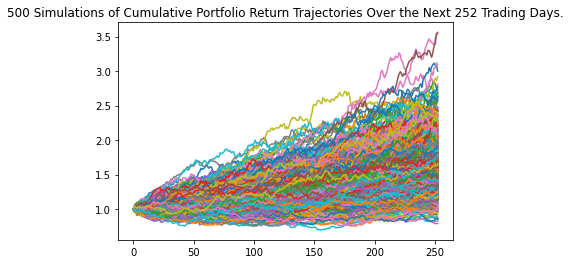

In [47]:
# Plot simulation outcomes
one_year_simulation.plot_simulation()

### 5.3 - Plot the Simulated Daily Returns Trajectory for `Ecom Portfolio` over the Next Year (252 Trading Days)

In [48]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(one_year_simulation.simulated_return.mean(axis=1)),
    "median": list(one_year_simulation.simulated_return.median(axis=1)),
    "min": list(one_year_simulation.simulated_return.min(axis=1)),
    "max": list(one_year_simulation.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001818,1.001275,0.958763,1.055286
2,1.004373,1.005799,0.936306,1.079764
3,1.007184,1.005936,0.907049,1.096986
4,1.008322,1.007854,0.918956,1.093044


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of the Ecom Portfolio Over the Next Year'}>

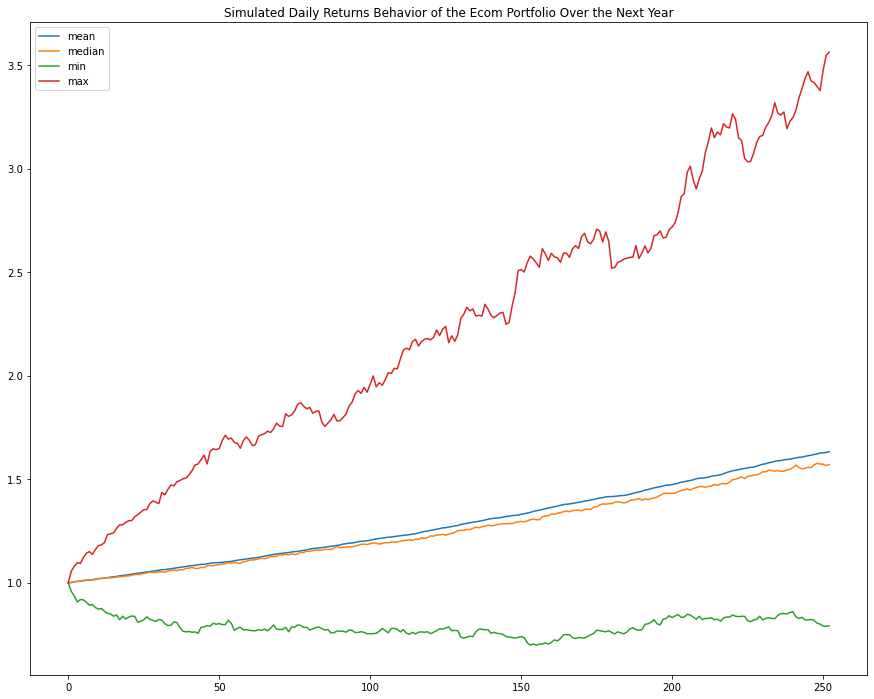

In [49]:
# Use the `plot` function to visually analyze the trajectory of the Ecom Portfolio daily returns on a 252 trading day simulation
df_simulated_returns.plot(figsize=(15,12), title="Simulated Daily Returns Behavior of the Ecom Portfolio Over the Next Year")

### 5.4 - Calculate the Simulated Profits/Losses of $500,000 Investment in `Ecom Portfolio` Over the Next `252` Trading Days

In [50]:
# Set initial investment
initial_investment = 500000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,500000.000000,500000.000000,500000.000000,500000.000000
1,500909.022982,500637.507163,479381.710257,527643.246477
2,502186.746674,502899.560672,468153.033159,539881.782000
3,503591.859456,502968.028068,453524.734576,548493.175618
4,504160.768865,503926.803500,459478.074359,546521.813152


In [63]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.hvplot(
    figsize=(200,160), 
    title="Simulated Prof investmentit/Losses of Ecom Portfolio Over the Next Year",
    yformatter = "%.2f")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = one_year_simulation.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.633456
std               0.430581
min               0.792141
25%               1.322058
50%               1.571106
75%               1.875721
max               3.563513
95% CI Lower      0.977330
95% CI Upper      2.637859
Name: 252, dtype: float64


In [53]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $500,000 investments in Ecom Portfolio
ci_lower = round(tbl[8]*500000,2)
ci_upper = round(tbl[9]*500000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $500,000 in the portfolio"
    f" over the next year will end within in the range of"
    f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $500,000 in the portfolio over the next year will end within in the range of $488665.11 and $1318929.38.


***

### Would you recommend this investment to a potential investor, and why?

Yes, we would recommend this investment particulary to an investor who has an Active strategy. We also think the potential return on this investment outweighs the potential loss and could make for even better returns over a longer period of time. 